# Iris Dataset EDA 

In [1]:
# Importing libraries

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

dataset = load_iris()

In [3]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Convert it in to Data Frame

data = pd.DataFrame(dataset['data'], columns = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width'])

In [5]:
data['Species'] = dataset['target']

In [7]:
data['Species'] = data['Species'].apply(lambda x: dataset['target_names'][x])

In [8]:
data.head()

,petal_length,petal_width,sepal_length,sepal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In iris dataset there are 150 rows/records and 5 columns/features.

In [10]:
# Size of the dataset

data.shape

(150, 5)

Use describe function to see the statistics of the dataset such as mean, meadian, mode, standard deviation etc.

In [11]:
data.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We need to verify the features are of which datatypes. We can use info() fiunction to do the same.
We can see that all of the features except Species are of float datatype and Species is of object/categorical datatype.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's see if there are any null values present in the dataset.
If there are any null values then need to follow one of the below steps.

* Drop records which have NA values

* Substitute mean(mean if the feature is numerical or mode if the feature is categorical)

* Fill the NA values with "?" or -9999

In [13]:
data.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
Species         0
dtype: int64

Now will do Visualization using Seaborn, Matplotlib visualizing tools to undrestand the relation shi between the numerical features.

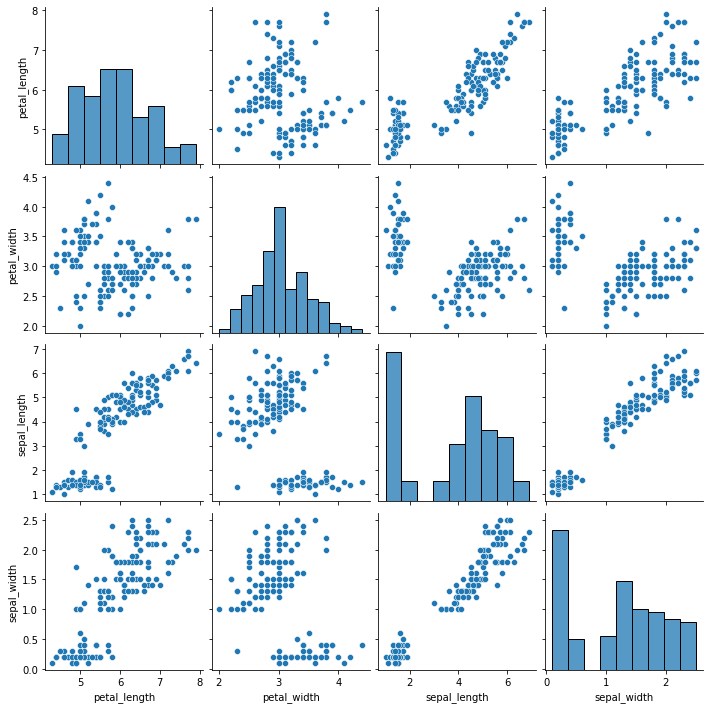

In [15]:
# Paie Plot

sns.pairplot(data)
plt.show()

Now will see how these features are correeted to each other using heatmap in seadorn lib.

Correlation between Sepal Length and Sepal Width using heatmap.

[]

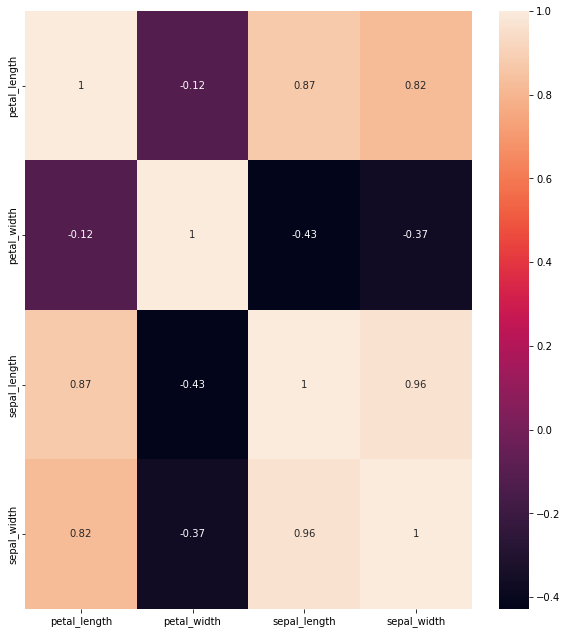

In [17]:
plt.figure(figsize = (10,11))
sns.heatmap(data.corr(),annot = True)
plt.plot()

Let's see how our data is distributed based on Sepal Length and Wdith feature using scatterplot.

<Figure size 720x1080 with 0 Axes>

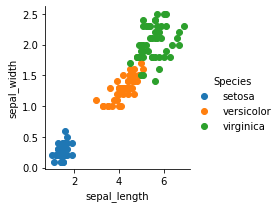

In [25]:
plt.figure(figsize=(10,15))
sns.FacetGrid(data, hue = "Species")\
.map(plt.scatter, "sepal_length", "sepal_width")\
.add_legend()
plt.show()

Now lets visulize the data with violin plot of all the input variables against output variable which is Species.
The viloinplot show density of the length and width in the species.
The thinner part denotes that there is less density whereas the fatter part conveys higher density

<AxesSubplot:xlabel='Species', ylabel='petal_width'>

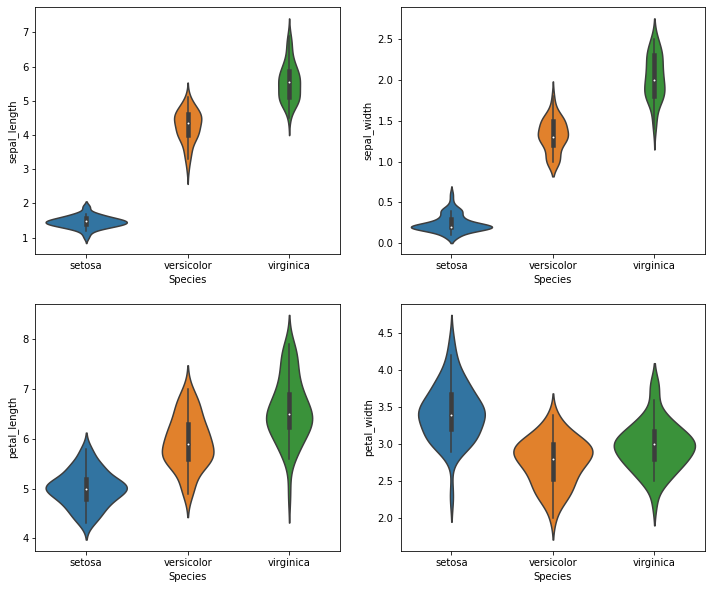

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x = "Species", y = "sepal_length", data = data)
plt.subplot(2,2,2)
sns.violinplot(x = "Species", y = "sepal_width", data = data)
plt.subplot(2,2,3)
sns.violinplot(x = "Species", y = "petal_length", data = data)
plt.subplot(2,2,4)
sns.violinplot(x = "Species", y = "petal_width", data = data)

And similarly use boeplot to see how the categorical feature "Species" is distributed with all other four input variables.

<AxesSubplot:xlabel='Species', ylabel='petal_width'>

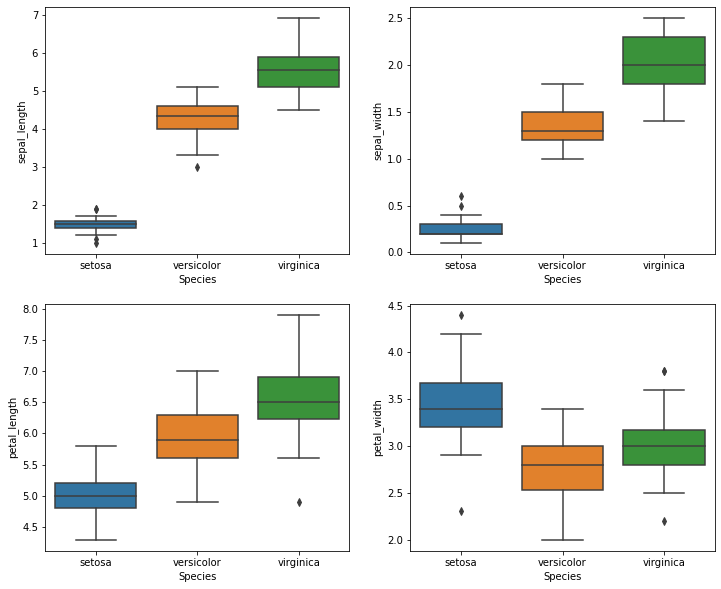

In [30]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.boxplot(x = "Species", y = "sepal_length", data = data)
plt.subplot(2,2,2)
sns.boxplot(x = "Species", y = "sepal_width", data = data)
plt.subplot(2,2,3)
sns.boxplot(x = "Species", y = "petal_length", data = data)
plt.subplot(2,2,4)
sns.boxplot(x = "Species", y = "petal_width", data = data)

# Import sklearn lidrary to build ML models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

Before implementing any model we need to split the dataset to train and test sets.
Use train_test_split class from sklearn.model_selection lib to split dataset

In [33]:
train,test = train_test_split(data, test_size = 0.3)

In [36]:
train.shape, test.shape

((105, 5), (45, 5))

Now leat's split the train and test sets further as input and output sets.

In [40]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.Species
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
97,4.3,1.3,6.2,2.9
123,4.9,1.8,6.3,2.7
90,4.4,1.2,5.5,2.6
57,3.3,1.0,4.9,2.4
115,5.3,2.3,6.4,3.2


In [41]:
train_y.head()

97     versicolor
123     virginica
90     versicolor
57     versicolor
115     virginica
Name: Species, dtype: object

In [42]:
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.Species

# Let's create SVM model and check the accuracy score

In [43]:
svmmodel = svm.SVC()
svmmodel.fit(train_X, train_y)
svmprediction = svmmodel.predict(test_X)
svmaccuracy = metrics.accuracy_score(svmprediction,test_y)
print("SVM model accuracy is {}".format(svmaccuracy))

SVM model accuracy is 0.9555555555555556


# Logistic Regression Model

In [45]:
lrmodel = LogisticRegression()
lrmodel.fit(train_X, train_y)
lrprediction = lrmodel.predict(test_X)
lraccuracy = metrics.accuracy_score(lrprediction, test_y)
print("Logistic Regression Model Accuracy is {} ".format(lraccuracy))

Logistic Regression Model Accuracy is 0.9333333333333333 


# Decision Tree Model

In [47]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(train_X, train_y)
dtpredict = dtmodel.predict(test_X)
dtaccuracy = metrics.accuracy_score(dtpredict, test_y)
print("Decission Tree Model Accuracy is {}".format(dtaccuracy*100))

Decission Tree Model Accuracy is 91.11111111111111


Accuracy score of our Decision Tree model is 91.11%. Curious about knowing which are the wrongly predicted records?

In [48]:
test_preddf = test.copy()
test_preddf['Predicted Species'] = dtpredict
wrongpred = test_preddf.loc[test['Species'] != dtpredict]
wrongpred

,petal_length,petal_width,sepal_length,sepal_width,Species,Predicted Species
134,6.1,2.6,5.6,1.4,virginica,versicolor
119,6.0,2.2,5.0,1.5,virginica,versicolor
70,5.9,3.2,4.8,1.8,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor


As we can see above 77th indexed record is actually versicolor Specie but predicted as virginica and other 2 records are of vriginica
but predicted as versicolor.

We can see that SVM model is producing the better accuracy than Logistic Regression and Decision Tree Models.